 ## 1. Optimisation free

es1 

find local minimum value  \begin{equation} f(x_1,x_2) = x_1^2 + 2x_1x_2 + x_2^2 \end{equation}

 

The minimum value of the function is at [0. 0.] and its value is 0.0


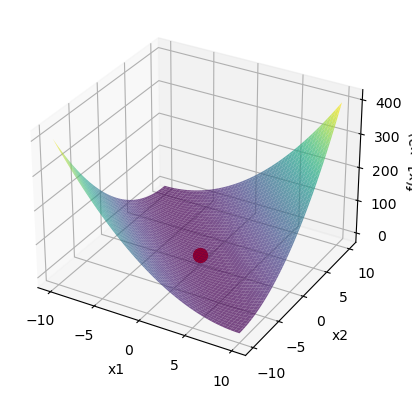

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Define the function
def f(x):
    return x[0]**2 + 2*x[0]*x[1] + x[1]**2

# Initial guess
x0 = [0, 0]

# Call the minimize function
res = minimize(f, x0)

# Print the result
print("The minimum value of the function is at", res.x, "and its value is", res.fun)

# Define the function for plotting
def f_plot(x1, x2):
    return x1**2 + 2*x1*x2 + x2**2

# Create a grid of points
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)

# Compute the function values
z = f_plot(x1, x2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.7)

# Plot the minimum point
min_x1, min_x2 = res.x
min_z = res.fun
ax.scatter(min_x1, min_x2, min_z, c='r', marker='o', s=100)

# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

# Show the plot
plt.show()


## 2. Constraint optimisation with Lagrange multiplyer

es2

find global max of this function:

\begin{equation} max(f(x_1,x_2)) = ln(x_1) + ln(x_2) \end{equation}

\begin{equation}  s.t. \space    2x_1 + 3x_2 = 6  \end{equation}


The maximum value of the function is at [1.49978596 1.00014269] and the value of point is: 0.4054650877473858


/var/folders/mw/thh8trg12f105cxctynsnj080000gn/T/ipykernel_12892/1657284671.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(x1) + np.log(x2)


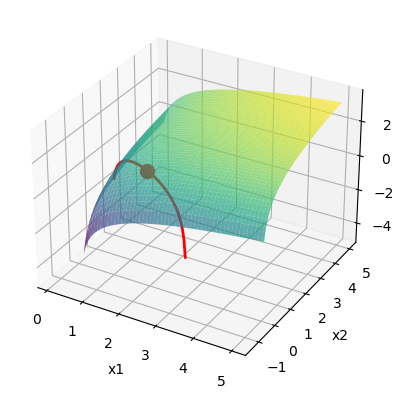

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Define the objective function
def f(x):
    return -1 * (np.log(x[0]) + np.log(x[1]))

# Define the constraint
cons = ({'type': 'eq', 'fun': lambda x:  np.array([2*x[0] + 3*x[1] - 6])})

# Initial guess
x0 = np.array([1, 1])

# Call the minimize function with method='SLSQP' (Sequential Least Squares Programming)
res = minimize(f, x0, constraints=cons, method='SLSQP')

# Print the result
print("The maximum value of the function is at", res.x, "and the value of point is:",-res.fun)

# Define the function for plotting
def f_plot(x1, x2):
    return np.log(x1) + np.log(x2)

# Create a grid of points
x1 = np.linspace(0.1, 5, 100)
x2 = np.linspace(0.1, 5, 100)
x1, x2 = np.meshgrid(x1, x2)

# Compute the function values
z = f_plot(x1, x2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.7)

# Plot the constraint
x1_constraint = np.linspace(0.1, 5, 100)
x2_constraint = (6 - 2*x1_constraint) / 3
z_constraint = f_plot(x1_constraint, x2_constraint)
ax.plot(x1_constraint, x2_constraint, z_constraint, 'r-', linewidth=2)

min_x1, min_x2 = res.x
min_z = -res.fun
ax.scatter(min_x1, min_x2, min_z, c='r', marker='o', s=100)


# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

# Show the plot
plt.show()
